In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

# Шаг 1. Загрузка данных

In [51]:
data1 = pd.read_csv('/datasets/users_go.csv')#Пользователи
data1.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [52]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [53]:
data2 = pd.read_csv('/datasets/rides_go.csv')#Поездки
data2.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [54]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [55]:
data3 = pd.read_csv('/datasets/subscriptions_go.csv')#Подписки
data3.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


В рамках обзора данных было установлено следующее:
- пропусков ни в одной из таблиц не обнаружено, работу над дубликатами проведем на следующем этапе;
- есть стобцы, в которых необходимо изменить тип данных.
Данные проблемы решим на этапе Предобработка данных.

# Шаг 2. Предобработка данных

In [56]:
data2['date'] = pd.to_datetime(data2['date'],format='%Y-%m-%dT%H:%M:%S')

<div class="alert alert-success">

**Артём:** 👍 Верно.
  
</div> 

In [57]:
data2['duration'] = np.ceil(data2['duration']).astype(int)

In [58]:
data2['month_number'] = data2['date'].dt.month

In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       18068 non-null  int64         
 1   distance      18068 non-null  float64       
 2   duration      18068 non-null  int64         
 3   date          18068 non-null  datetime64[ns]
 4   month_number  18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 705.9 KB


In [60]:
data2.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,26,2021-01-01,1
1,1,2617.592153,16,2021-01-18,1
2,1,754.159807,7,2021-04-20,4
3,1,2694.783254,19,2021-08-11,8
4,1,4028.687306,27,2021-08-28,8


In [61]:
data1.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [62]:
data2.isna().sum()

user_id         0
distance        0
duration        0
date            0
month_number    0
dtype: int64

In [63]:
data1.duplicated().sum()

31

In [64]:
data1 = data1.drop_duplicates()

In [65]:
data1.duplicated().sum()

0

In [66]:
data2.duplicated().sum()

0

В рамках предобработки удалили явные дубликаты, изменили тип данных в одном из столбцов.

# Шаг 3. Исследовательский анализ данных

Опишите и визуализируйте общую информацию о пользователях и поездках:


In [67]:
city_sort = data1.groupby(by='city')['city'].count().sort_values()

<AxesSubplot:title={'center':'Частота встречаемости городов'}, xlabel='Название города', ylabel='Частота встречаемости города'>

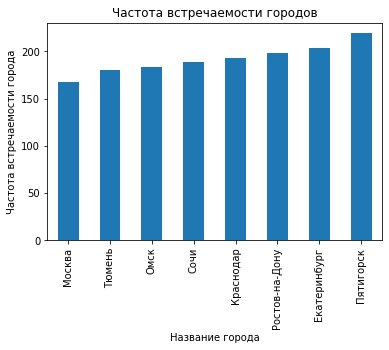

In [68]:
city_sort.plot(kind='bar', title = 'Частота встречаемости городов', ylabel = 'Частота встречаемости города', xlabel = 'Название города') #частота встречаемости городов

**Вывод: График выше показывает, что Пятигорск занимает первое место среди всех городов по частоте встречаемости, скорей всего именно с этого города GoFast начал свою деятельность. Москва при этом гораздо менее популярна, возможно в Москве компания относительно недавно начала распространять самокаты.**

In [69]:
data1['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без подписки'}, xlabel='Тип подписки', ylabel='Количество пользователей'>

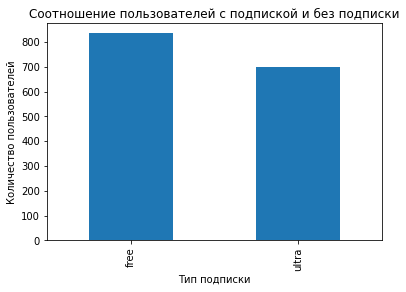

In [70]:
data1.groupby(by='subscription_type')['subscription_type'].count().plot(kind='bar', title = 'Соотношение пользователей с подпиской и без подписки', ylabel = 'Количество пользователей', xlabel = 'Тип подписки') #соотношение пользователей с подпиской и без подписки

**Вывод: По графику видно, что пользователей без подписки больше пользователей с подпиской, при этом сама разница не значительная.
Это показывает то, что почти половина пользователей переходят на платную подписку. 
Неплохо работает или реклама, или условия пользования подпиской, или все вместе.**

In [71]:
unique_values = data1['age'].unique()
pd.Series(unique_values).sort_values()

17    12
20    13
13    14
21    15
23    16
16    17
8     18
14    19
2     20
7     21
0     22
6     23
10    24
5     25
3     26
9     27
4     28
11    29
15    30
1     31
12    32
19    33
24    34
18    35
26    36
22    37
25    38
27    39
28    43
dtype: int64

12–18 — 'до 18 лет';
19-26 — 'до 26 лет';
27–33 — 'до 33 лет';
34–43 — 'до 43 лет';

In [72]:
def categorize_age(i):
    try:
        if 12 <= i <= 18:
            return 'до 18 лет'
        elif 19 <= i <= 26:
            return 'до 26 лет'
        elif 27 <= i <= 33:
            return 'до 33 лет'
        elif 34 <= i <= 43:
            return 'до 43 лет'
    except:
        pass

In [73]:
data1['age_category'] = data1['age'].apply(categorize_age)

In [74]:
data1.head()

,user_id,name,age,city,subscription_type,age_category
0,1,Кира,22,Тюмень,ultra,до 26 лет
1,2,Станислав,31,Омск,ultra,до 33 лет
2,3,Алексей,20,Москва,ultra,до 26 лет
3,4,Константин,26,Ростов-на-Дону,ultra,до 26 лет
4,5,Адель,28,Омск,ultra,до 33 лет


<AxesSubplot:title={'center':'Возраст пользователей'}, xlabel='Категории возрастов', ylabel='Количество пользователей'>

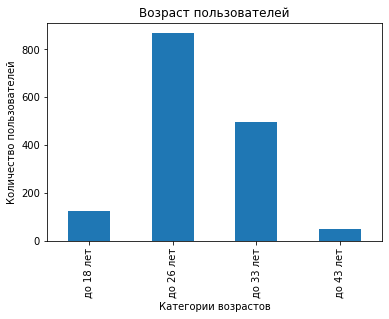

In [75]:
data1.groupby(by='age_category')['age_category'].count().plot(kind='bar', title = 'Возраст пользователей',ylabel = 'Количество пользователей', xlabel = 'Категории возрастов') #возраст пользователей

**Вывод: По графику видно, что наибольший удельный вес имеют пользователи в возрасте от 19 до 26 лет.
На эту аудиторию и стоит ориентироваться при планировании стратегии компании.**

In [76]:
data2.head()

,user_id,distance,duration,date,month_number
0,1,4409.919140,26,2021-01-01,1
1,1,2617.592153,16,2021-01-18,1
2,1,754.159807,7,2021-04-20,4
3,1,2694.783254,19,2021-08-11,8
4,1,4028.687306,27,2021-08-28,8


In [77]:
data2['distance'].sort_values()

11555       0.855683
9541        2.570787
13690       4.329506
8658        6.784447
7841        7.097072
            ...     
17242    6724.932981
17171    6760.940067
15580    6908.491343
16484    7066.003772
16309    7211.007745
Name: distance, Length: 18068, dtype: float64

Минимальная дистанциая, которую пользователи проехали на самокатах - 855 метров.
Максимальная - 7.2 км.

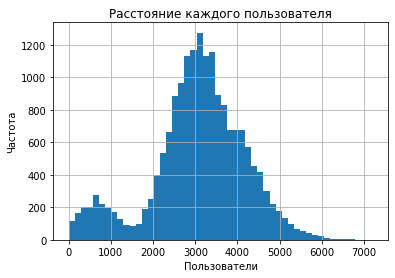

In [78]:
data2.hist('distance', bins=50)
plt.xlabel('Пользователи')
plt.ylabel('Частота')
plt.title('Расстояние каждого пользователя')
plt.show()

**Большинство пользователей проежает расстояние от 2.5-3.5 км.**

In [79]:
data2['duration'].sort_values()

6860      1
16704     1
10426     1
16336     1
6531      1
         ..
1998     39
6453     39
2623     40
4709     40
4215     41
Name: duration, Length: 18068, dtype: int64

Минимальная продолжительность поездки - 1 мин. Возможно, что пользователь случайно воспользовался приложением или у него возникли проблемы в использовании самоката на первом этапе пользования самокатом.
Максимальная - 41 мин.

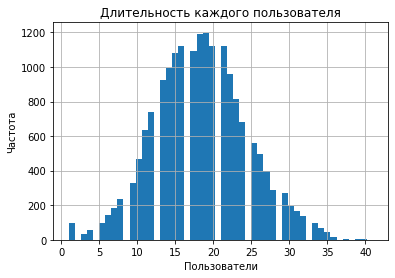

In [80]:
data2.hist('duration', bins=50)
plt.xlabel('Пользователи')
plt.ylabel('Частота')
plt.title('Длительность каждого пользователя')
plt.show()

**Большинство пользователей пользуется приложением от 15-23 мин.**

# Шаг 4. Объединение данных

Объединие данных о пользователях, поездках и подписках в один датафрейм

In [81]:
data4 = data1.merge(data2, on='user_id')
data4 = data4.merge(data3)

In [82]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   age_category       18068 non-null  object        
 6   distance           18068 non-null  float64       
 7   duration           18068 non-null  int64         
 8   date               18068 non-null  datetime64[ns]
 9   month_number       18068 non-null  int64         
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(4)
memory 

**В получившийся датафрейм вошли все необходимые столбцы и строки**

In [83]:
data4.query('subscription_type == "ultra"')

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,до 26 лет,4409.919140,26,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,до 26 лет,2617.592153,16,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,до 26 лет,754.159807,7,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,до 26 лет,2694.783254,19,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,до 26 лет,4028.687306,27,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,до 26 лет,3973.046497,25,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,до 26 лет,3288.702563,16,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,до 26 лет,3076.159348,15,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,до 26 лет,4707.845501,16,2021-10-17,10,6,0,199


In [84]:
sub_data = data4.query('subscription_type == "ultra"')

In [85]:
data4.query('subscription_type != "ultra"')

,user_id,name,age,city,subscription_type,age_category,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,до 26 лет,2515.690719,15,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,до 26 лет,846.932642,17,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,до 26 лет,4004.434142,21,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,до 26 лет,1205.911290,10,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,до 26 лет,3047.379435,18,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,до 26 лет,3781.098080,20,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,до 26 лет,2840.423057,22,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,до 26 лет,3826.185507,19,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,до 26 лет,2902.308661,17,2021-11-27,11,8,50,0


In [86]:
nosub_data = data4.query('subscription_type != "ultra"')

Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

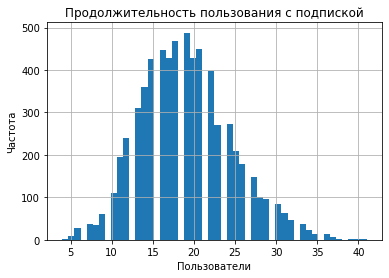

In [87]:
sub_data.hist('duration', bins=50)
plt.xlabel('Пользователи')
plt.ylabel('Частота')
plt.title('Продолжительность пользования c подпиской')
plt.show()

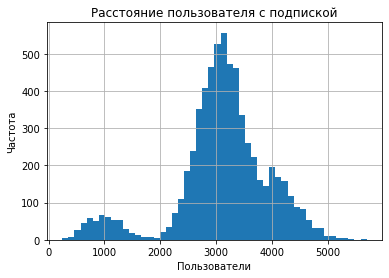

In [88]:
sub_data.hist('distance', bins=50)
plt.xlabel('Пользователи')
plt.ylabel('Частота')
plt.title('Расстояние пользователя c подпиской')
plt.show()

**Вывод:**
С подпиской: 
- по времени пользования - от 15 до 23 мин. Пик на 18 мин.
- по расстоянию - от 2.5 до 4 км. Пик при этом на 3-х км.


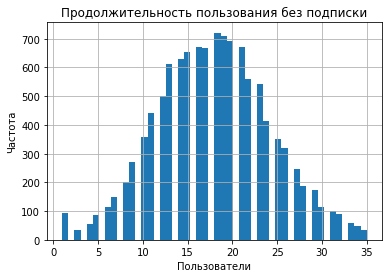

In [89]:
nosub_data.hist('duration', bins=50)
plt.xlabel('Пользователи')
plt.ylabel('Частота')
plt.title('Продолжительность пользования без подписки')
plt.show()

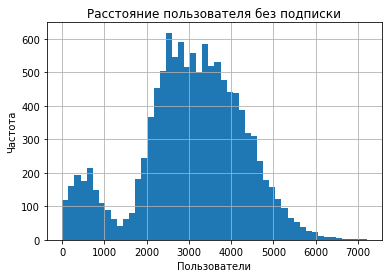

In [90]:
nosub_data.hist('distance', bins=50)
plt.xlabel('Пользователи')
plt.ylabel('Частота')
plt.title('Расстояние пользователя без подписки')
plt.show()

**Вывод:**
Без подписки: 
- по времени пользования - от 13 до 21 мин.
- по расстоянию - от 2 до 4 км. Пик при этом на 2.5-х км.
Можно сделать вывод, что с подпиской пользователи проезжают большее расстояние.

# Шаг 5. Подсчёт выручки

In [91]:
agg_data = data4.groupby(['user_id', 'month_number']).agg({
'distance': 'sum',
'duration': 'sum',
'date': 'count', # Используем столбец 'date' для подсчета количества поездок
'subscription_type': 'min'
}).reset_index(drop=True)
print (agg_data)

           distance  duration  date subscription_type
0       7027.511294        42     2             ultra
1        754.159807         7     1             ultra
2       6723.470560        46     2             ultra
3       5809.911100        32     2             ultra
4       7003.499363        56     3             ultra
...             ...       ...   ...               ...
11326   3409.468534        26     2              free
11327   7622.453034        48     2              free
11328   4928.173852        23     1              free
11329  13350.015305        78     4              free
11330   2371.711192        16     1              free

[11331 rows x 4 columns]


In [92]:
def revenue(row):
    if row['subscription_type']=='ultra':
        return 6 * row['duration'] + 199
    elif row['subscription_type']== 'free':
        return 8 * row['duration'] + 50 * row['date']
    else:
        print('no sub')

In [93]:
agg_data['revenue'] = agg_data.apply(revenue, axis=1)

In [94]:
agg_data['revenue'].sort_values()

8785       58
10181      58
6756       58
7665       58
9154       58
         ... 
10071    1284
10413    1342
4661     1348
7621     1382
10791    1444
Name: revenue, Length: 11331, dtype: int64

**Вывод: Сортировка показывает,что минимальное значение выручки - 58 рублей.
При этом максимальное - почти 1.5 тыс. рублей.**

# Шаг 6. Проверка гипотез

**6.1** Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
 
H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free

H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free

alpha = 0.05

In [95]:
sub = sub_data ['duration']
nosub = nosub_data ['duration']

alpha = 0.05 
results = st.ttest_ind(sub, nosub, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


**Вывод: время поездки пользователей на тарифе ultra не равно времени поездки пользователей на тарифе free. Нулевую гипотезу отвергли.**

**6.2** Расстояние одной поездки в 
 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130 метров? Проверим гипотезу и сделаем выводы.

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров

H_1: Расстояние (distance) пользователей на подписке ultra < 3130 метров

alpha = 0.05

In [96]:
sub = sub_data ['distance']
optimal_value = 3130

alpha = 0.05 
results = st.ttest_1samp(sub, optimal_value, alternative = 'less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


**Вывод: после проверки гипотезы нельзя сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.**

**6.3.**Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

H_0: Выручка (revenue) пользователей на подписке ultra = Выручка (revenue) пользователей без подписки Ultra

H_0: Выручка (revenue) пользователей на подписке ultra > Выручка (revenue) пользователей без подписки Ultra

alpha = 0.05

In [97]:
sub = agg_data.loc[agg_data ['subscription_type'] == 'ultra', 'revenue']
nosub = agg_data.loc[agg_data ['subscription_type'] == 'free', 'revenue']

alpha = 0.05 
results = st.ttest_ind(sub, nosub)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод: отвергаем гипотезу: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**

**6.4.** Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:** Подойдет парный t-тест (t-тест для зависимых выборок) для проверки гипотезы о равенстве средних.

**Гипотезы:**
- H0 : μ1 = μ2
- H1 : μ1 != μ2  
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.

**Метод: scipy.stats.ttest_rel()**

# Общий вывод

## Предобработка данных
*В рамках предобработки данных были произведены следующие операции*: 
- изменение типов данных;
- обработка дупликатов;  
## Проведение исследовательского анализа данных
- Пятигорск занимает первое место среди всех городов по частоте встречаемости, скорей всего именно с этого города GoFast начал свою деятельность. Москва при этом гораздо менее популярна, возможно в Москве компания относительно недавно начала распространять самокаты
- Пользователей без подписки больше пользователей с подпиской, при этом сама разница не значительная. Это показывает то, что почти половина пользователей переходят на платную подписку. Неплохо работает или реклама, или условия пользования подпиской, или все вместе.
- Наибольший удельный вес имеют пользователи в возрасте от 19 до 26 лет.
На эту аудиторию и стоит ориентироваться при планировании стратегии компании.
- Большинство пользователей проежает расстояние от 2.5-3.5 км.
- Большинство пользователей пользуется приложением от 15-23 мин.  
## Объединение данных
С подпиской:
- по времени пользования - от 15 до 23 мин. Пик на 18 мин.
- по расстоянию - от 2.5 до 4 км. Пик при этом на 3-х км.
Без подписки:
- по времени пользования - от 13 до 21 мин.
- по расстоянию - от 2 до 4 км. Пик при этом на 2.5-х км.
Можно сделать вывод, что с подпиской пользователи проезжают большее расстояние.  
## Расчет выручки
Сортировка показывает,что минимальное значение выручки - 58 рублей. При этом максимальное - почти 1.5 тыс. рублей.  
## Проверка гипотез
- время поездки пользователей на тарифе ultra не равно времени поездки пользователей на тарифе free. Нулевую гипотезу отвергли.
- после проверки гипотезы нельзя сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.
- отвергаем гипотезу: будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки
- Подойдет парный t-тест (t-тест для зависимых выборок) для проверки гипотезы о равенстве средних.